In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import networkx as nx
from networkx import Graph
from networkx.algorithms import bipartite
import numpy as np

In [2]:
df = pd.read_csv('winedata.csv', index_col='index')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
index,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
#Extract the year from the title column
df['year'] = df['title'].str.extract('(\d{4})',expand=False)
df.dropna(subset=['year'],inplace=True)
df['year'] = df['year'].astype(int)

#keep only the years between 1970 and 2022
df = df[df['year']>1970]
df = df[df['year']<2022]

df['year'].describe()

count    125156.000000
mean       2010.693007
std           3.569788
min        1973.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125156 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                125095 non-null  object 
 1   description            125156 non-null  object 
 2   designation            88058 non-null   object 
 3   points                 125156 non-null  int64  
 4   price                  116656 non-null  float64
 5   province               125095 non-null  object 
 6   region_1               104499 non-null  object 
 7   region_2               49686 non-null   object 
 8   taster_name            100031 non-null  object 
 9   taster_twitter_handle  95202 non-null   object 
 10  title                  125156 non-null  object 
 11  variety                125155 non-null  object 
 12  winery                 125156 non-null  object 
 13  year                   125156 non-null  int64  
dtypes: float64(1), int64(2), object(11)


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22031 entries, 4 to 129950
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                22031 non-null  object 
 1   description            22031 non-null  object 
 2   designation            22031 non-null  object 
 3   points                 22031 non-null  int64  
 4   price                  22031 non-null  float64
 5   province               22031 non-null  object 
 6   region_1               22031 non-null  object 
 7   region_2               22031 non-null  object 
 8   taster_name            22031 non-null  object 
 9   taster_twitter_handle  22031 non-null  object 
 10  title                  22031 non-null  object 
 11  variety                22031 non-null  object 
 12  winery                 22031 non-null  object 
 13  year                   22031 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 2.5

<function matplotlib.pyplot.show(close=None, block=None)>

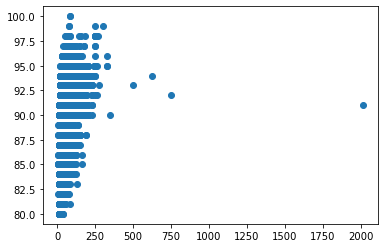

In [6]:
plt.scatter(df['price'],df['points'])
plt.show

In [7]:
df = df[df['price']<= 300]

<function matplotlib.pyplot.show(close=None, block=None)>

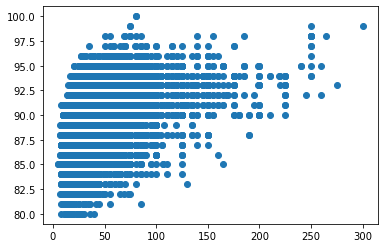

In [8]:
plt.scatter(df['price'],df['points'])
plt.show

In [9]:
#Use value count to keep only the winery with more than 10 wines
top_winery = df['winery'].value_counts()
df = df[df['winery'].isin(top_winery[top_winery>10].index)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14746 entries, 10 to 129950
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                14746 non-null  object 
 1   description            14746 non-null  object 
 2   designation            14746 non-null  object 
 3   points                 14746 non-null  int64  
 4   price                  14746 non-null  float64
 5   province               14746 non-null  object 
 6   region_1               14746 non-null  object 
 7   region_2               14746 non-null  object 
 8   taster_name            14746 non-null  object 
 9   taster_twitter_handle  14746 non-null  object 
 10  title                  14746 non-null  object 
 11  variety                14746 non-null  object 
 12  winery                 14746 non-null  object 
 13  year                   14746 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.

<function matplotlib.pyplot.show(close=None, block=None)>

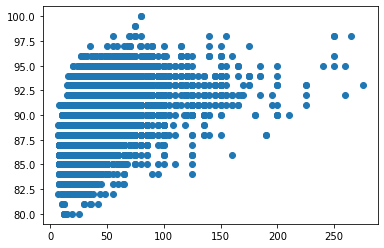

In [10]:
plt.scatter(df['price'],df['points'])
plt.show

In [11]:
node_list = df.index.copy()
node_list = list(node_list)

node_list_reset =[]
for i in range (len(node_list)):
    node_list_reset.append(i)

len(node_list_reset)

14746

In [12]:
#create a graph where the nodes are the wines and the edges are the wineries
G = nx.Graph()
for node in range(len(node_list)):
    G.add_node(node_list[node])


In [13]:
nx.to_pandas_adjacency(G)

,10,23,25,35,64,67,84,94,108,111,...,129895,129898,129899,129904,129909,129913,129915,129926,129949,129950
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#add edges using a function
def find_edges(df_input):
    edges = []
    for i in range(len(df_input)):
        for j in range(len(df_input)):
            if df_input.iloc[i]['winery'] == df_input.iloc[j]['winery'] and i != j:
                edges.append((df_input.iloc[i]['title'], df_input.iloc[j]['title']))
    return edges

#this function is not all efficient for the size of the dataframe

In [15]:
#add edges to the graph using a function
def find_edges_V2(df_input):
    unique_wineries = df_input['winery'].unique()
    for winery in unique_wineries:
        df_temp = df_input[df_input['winery'] == winery]
        for index1, row1 in df_temp.iterrows():
            for index2, row2 in df_temp.iterrows():
                if row1['title'] != row2['title']:
                    G.add_edge(index1, index2)

find_edges_V2(df)

In [16]:
G = nx.convert_node_labels_to_integers(G)

In [17]:
adjency_matrix = nx.to_pandas_adjacency(G)
adjency_matrix

,0,1,2,3,4,5,6,7,8,9,...,14736,14737,14738,14739,14740,14741,14742,14743,14744,14745
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
edge_list = nx.to_pandas_edgelist(G)

edge_list.rename(columns={'source':'id1', 'target':'id2'},inplace=True)

edge_list

,id1,id2
0,0,299
1,0,406
2,0,407
3,0,664
4,0,2115
...,...,...
236217,14673,14681
236218,14680,14681
236219,14690,14691
236220,14703,14704


In [19]:
df_attributes = pd.DataFrame([node_list_reset, df['points'],df['year'],df['region_2'],df['price']])
df_attributes = df_attributes.T
df_attributes.rename(columns={0:'node_id', 1:'points',2:'year',3:'region_2',4:'price'},inplace=True)

#Choose target to be the price
df_target = df_attributes[['node_id','price']].copy()

In [20]:
df_attributes.drop('price',axis=1,inplace=True)
df_attributes

,node_id,points,year,region_2
0,0,87,2011,Napa
1,1,87,2011,Central Coast
2,2,87,2011,Sonoma
3,3,86,2010,Willamette Valley
4,4,86,2015,Central Coast
...,...,...,...,...
14741,14741,92,2005,Columbia Valley
14742,14742,91,2005,Columbia Valley
14743,14743,91,2005,Columbia Valley
14744,14744,90,2013,Napa


In [21]:
codes, uniques = pd.factorize(df_attributes['region_2'])
df_attributes['region_2'] = codes
df_attributes

,node_id,points,year,region_2
0,0,87,2011,0
1,1,87,2011,1
2,2,87,2011,2
3,3,86,2010,3
4,4,86,2015,1
...,...,...,...,...
14741,14741,92,2005,4
14742,14742,91,2005,4
14743,14743,91,2005,4
14744,14744,90,2013,0


In [22]:
df_target = df_target.copy()
df_target.rename(columns={'price':'target'},inplace=True)
df_target

,node_id,target
0,0,19.0
1,1,22.0
2,2,69.0
3,3,50.0
4,4,26.0
...,...,...
14741,14741,44.0
14742,14742,40.0
14743,14743,41.0
14744,14744,35.0


In [23]:
#go csv
edge_list.to_csv('edges.csv',index=False)
df_target.to_csv('target.csv',index=False)
df_attributes.to_csv('features.csv',index=False)

In [24]:
#encode features
df_features= pd.read_csv('features.csv')
df_features

,node_id,points,year,region_2
0,0,87,2011,0
1,1,87,2011,1
2,2,87,2011,2
3,3,86,2010,3
4,4,86,2015,1
...,...,...,...,...
14741,14741,92,2005,4
14742,14742,91,2005,4
14743,14743,91,2005,4
14744,14744,90,2013,0


In [25]:
# feature: {NaN: 0, 'points': 1,  'year': 2, 'region_2': 3}
#  value
df_features['New Column'] = 'Constant Value'

standard_list =[]

for item in range(len(df_features['New Column'])):
    standard_list.append([1,2,3])

df_features['New Column'] = standard_list

value_list = []

for index, row in df_features.iterrows():
    value_list.append([row['points'],row['year'],row['region_2']])

df_features['value'] = value_list
df_features = df_features.drop(columns=['points','year','region_2'],axis=1)
df_features.rename(columns={'New Column':'feature_id'},inplace=True)

df_features

,node_id,feature_id,value
0,0,"[1, 2, 3]","[87, 2011, 0]"
1,1,"[1, 2, 3]","[87, 2011, 1]"
2,2,"[1, 2, 3]","[87, 2011, 2]"
3,3,"[1, 2, 3]","[86, 2010, 3]"
4,4,"[1, 2, 3]","[86, 2015, 1]"
...,...,...,...
14741,14741,"[1, 2, 3]","[92, 2005, 4]"
14742,14742,"[1, 2, 3]","[91, 2005, 4]"
14743,14743,"[1, 2, 3]","[91, 2005, 4]"
14744,14744,"[1, 2, 3]","[90, 2013, 0]"


In [26]:
df_explode = df_features.explode(['feature_id', 'value'])
df_explode

,node_id,feature_id,value
0,0,1,87
0,0,2,2011
0,0,3,0
1,1,1,87
1,1,2,2011
...,...,...,...
14744,14744,2,2013
14744,14744,3,0
14745,14745,1,90
14745,14745,2,2012


In [27]:
df_explode.to_csv('features.csv', index=False)